In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols, glm

In [2]:
white_df = pd.read_csv('./winequality-white.csv', sep = ';', header = 0, engine= 'python')
white_df.to_csv('./winequality-white2.csv', index = False)
red_df = pd.read_csv('./winequality-red.csv', sep = ';', header = 0, engine = 'python')
red_df.to_csv('./winequality-red2.csv', index = False)

In [3]:
red_df.insert(0, column = 'type', value = 'red')
red_df.columns = red_df.columns.str.replace(' ','_')

white_df.insert(0, column = 'type', value = 'white')
white_df.columns = white_df.columns.str.replace(' ','_')

wine = pd.concat([red_df[3:], white_df[3:]])
wine.to_csv('./wineReport.csv', index = False)

In [4]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.084950381312874, pvalue=1.5459637928017986e-23)

In [5]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + total_sulfur_dioxide + density + pH + alcohol'
regression_result = ols(Rformula, data = wine).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     304.8
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        16:59:51   Log-Likelihood:                -7295.4
No. Observations:                6491   AIC:                         1.461e+04
Df Residuals:                    6482   BIC:                         1.467e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.1217     11.256      1.166      0.244      -8.945      35.188
fixed_acidity            0.0351      0.015      2.318      0.020       0.005       0.065
volatile_acidity        -1.4528      0.071    -20.385      0.000      -1.592      -1.313
residual_sugar           0.0283      0.005      5.739      0.000       0.019       0.038
chlorides                0.2619      0.326      0.804      0.421      -0.377       0.900
total_sulfur_dioxide    -0.0012      0.000     -5.150      0.000      -0.002      -0.001
density                -11.8416     11.500     -1.030      0.303     -34.385      10.702
pH                       0.4033      0.091      4.430      0.000       0.225       0.582
alcohol                  0.3225      0.016     20.228      0.000       0.291       0.354
==============================================================================
Omnibus:                      120.000   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.387
Skew:                          -0.020   Prob(JB):                     1.16e-54
Kurtosis:                       3.957   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
red_sample = red_df[red_df.columns.difference(['quality'])]
red_sample = red_sample[0:3][:]
white_sample = white_df[white_df.columns.difference(['quality'])]
white_sample = white_sample[0:3][:]
sample = pd.concat([red_sample, white_sample])

In [7]:
sample_predict = regression_result.predict(sample)

In [8]:
sample_predict

0    5.029879
1    4.785439
2    4.986653
0    5.569573
1    5.435388
2    5.883014
dtype: float64

In [9]:
red_df[0:3]['quality'], white_df[0:3]['quality']

(0    5
 1    5
 2    5
 Name: quality, dtype: int64,
 0    6
 1    6
 2    6
 Name: quality, dtype: int64)

C:\Users\dbscj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dbscj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


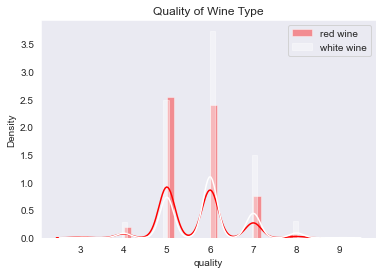

In [10]:
sns.set_style('dark')
sns.distplot(red_wine_quality, color="red", kde = True, label = 'red wine')
sns.distplot(white_wine_quality, color="white", kde = True, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

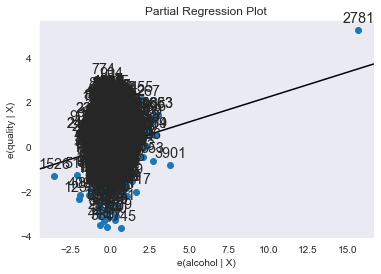

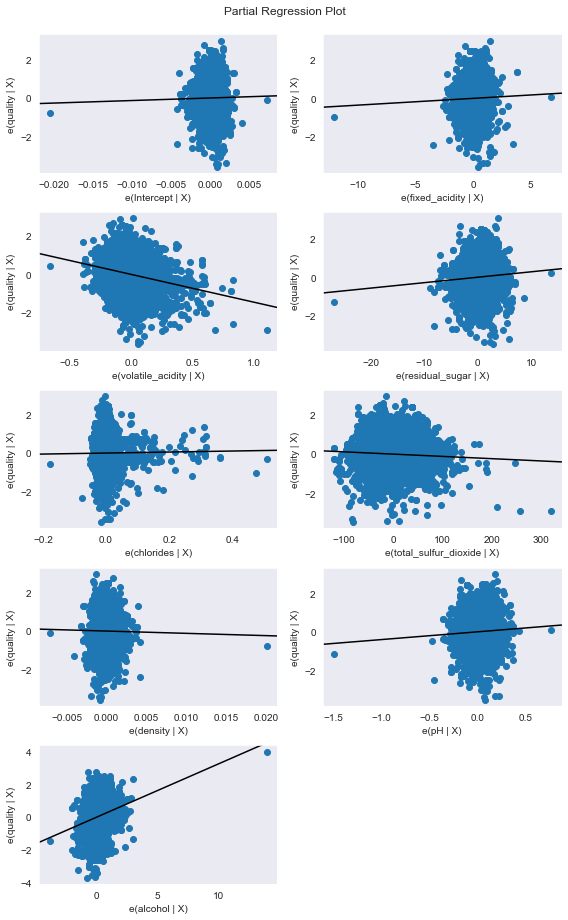

In [12]:
others = list(set(wine.columns).difference(set(["quality", "alcohol"])))
p, resids = sm.graphics.plot_partregress("quality", "alcohol", others, data = wine, ret_coords = True)
plt.show()
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

In [89]:
wine3 = pd.concat([red_df[3:], white_df[3:]])

In [90]:
wine3

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
